<a href="https://colab.research.google.com/github/sarahlai30/INDE577/blob/main/penguins_k_fold_cross_validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
penguins = sns.load_dataset("penguins")
penguins_cleaned = penguins.dropna()
penguins_cleaned




,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


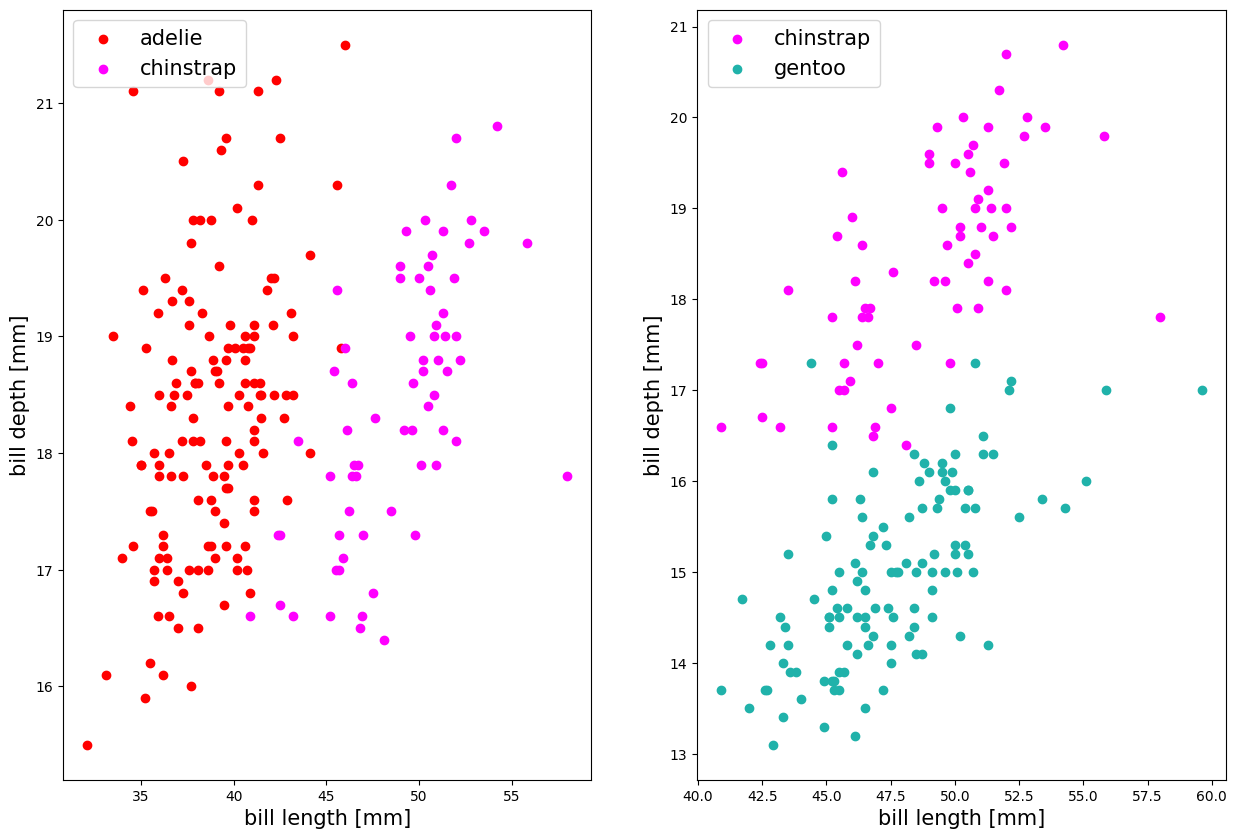

In [37]:
adelie = penguins_cleaned[penguins_cleaned.species == "Adelie"]
chinstrap = penguins_cleaned[penguins_cleaned.species == "Chinstrap"]
gentoo = penguins_cleaned[penguins_cleaned.species == "Gentoo"]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))

ax1.scatter(adelie.bill_length_mm,
            adelie.bill_depth_mm,
            color = "red",
            label = "adelie")
ax1.scatter(chinstrap.bill_length_mm,
            chinstrap.bill_depth_mm,
            color = "magenta",
            label = "chinstrap")
ax1.set_xlabel("bill length [mm]", fontsize = 15)
ax1.set_ylabel("bill depth [mm]", fontsize = 15)
ax1.legend(fontsize = 15, loc = "upper left")


ax2.scatter(chinstrap.bill_length_mm,
            chinstrap.bill_depth_mm,
            color = "magenta",
            label = "chinstrap")
ax2.scatter(gentoo.bill_length_mm,
            gentoo.bill_depth_mm,
            color = "lightseagreen",
            label = "gentoo")
ax2.set_xlabel("bill length [mm]", fontsize = 15)
ax2.set_ylabel("bill depth [mm]", fontsize = 15)
ax2.legend(fontsize = 15, loc = "upper left")
plt.show()

In [5]:
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))
plt.figure(figsize = (10, 8))
plt.xlim((2.75, 7 ))
plt.scatter(versicolor.petal_length,
            np.zeros(50),
            color = "magenta",
            label = "versicolor")
plt.scatter(virginica.petal_length,
            np.ones(50),
            color = "lightseagreen",
            label = "virginica")
plt.vlines(4.75, 0.0, 1.0)
plt.xlabel("petal length [cm]", fontsize = 15)
plt.ylabel("label", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper left")
plt.title("Non-Linearly Seperable Data", fontsize = 18)
plt.show()

In [136]:
import numpy as np

class SingleNeuron(object):
    """
    A class used to represent a single artificial neuron.

    ...

    Attributes
    ----------
    activation_function : function
        The activation function applied to the preactivation linear combination.

    cost_function : function
        The cost function used to measure model performance.

    w_ : numpy.ndarray
        The weights and bias of the single neuron. The last entry being the bias.
        This attribute is created when the train method is called.

    errors_: list
        A list containing the mean sqaured error computed after each iteration
        of stochastic gradient descent per epoch.

    Methods
    -------
    train(self, X, y, alpha = 0.005, epochs = 50)
        Iterates the stochastic gradient descent algorithm through each sample
        a total of epochs number of times with learning rate alpha. The data
        used consists of feature vectors X and associated labels y.

    predict(self, X)
        Uses the weights and bias, the feature vectors in X, and the
        activation_function to make a y_hat prediction on each feature vector.
    """
    def __init__(self, activation_function, cost_function):
        self.activation_function = activation_function
        self.cost_function = cost_function

    def train(self, X, y, alpha = 0.005, epochs = 50):

        self.w_ = np.random.rand(1 + X.shape[1])
        self.errors_ = []
        N = X.shape[0]

        for _ in range(epochs):
            errors = 0
            for xi, target in zip(X, y):
                error = (self.predict(xi) - target)
                self.w_[:-1] -= alpha*error*xi
                self.w_[-1] -= alpha*error
                #errors += .5*((self.predict(xi) - target)**2)
                errors += self.cost_function(self.predict(xi), target)
            self.errors_.append(errors/N)
        return self

    def predict(self, X):
        preactivation = np.dot(X, self.w_[:-1]) + self.w_[-1]
        return self.activation_function(preactivation)

    def plot_cost_function(self):
        fig, axs = plt.subplots(figsize = (10, 8))
        axs.plot(range(1, len(self.errors_) + 1),
                self.errors_,
                label = "Cost function")
        axs.set_xlabel("epochs", fontsize = 15)
        axs.set_ylabel("Cost", fontsize = 15)
        axs.legend(fontsize = 15)
        axs.set_title("Cost Calculated after Epoch During Training", f
                      ontsize = 18)
        plt.show()

    def plot_decision_boundary(self, X, y, xstring="x", ystring="y",
                               title="Neuron Decision Boundary"):
        plt.figure(figsize=(10, 8))
        plot_decision_regions(X, y, clf=self)
        plt.title(title, fontsize=18)
        plt.xlabel(xstring, fontsize=15)
        plt.ylabel(ystring, fontsize=15)
        plt.tight_layout()
        plt.show()


In [131]:
from sklearn.utils import resample

def cross_entropy_loss(y_hat, y):
    return - y*np.log(y_hat) - (1 - y)*np.log(1 - y_hat)

node = SingleNeuron(sigmoid, cross_entropy_loss)
gentoo_downsampled = resample(gentoo,
                               replace=False,     # sample without replacement
                               n_samples=62,      # match minority class
                               random_state=42)   # reproducible results

# Combine the downsampled majority class with the minority class
downsampled = pd.concat([gentoo_downsampled, chinstrap])
downsampled = downsampled.sample(frac=1, random_state=42).reset_index(drop=True)

# Prepare your X and y
X = downsampled.bill_depth_mm.values.reshape(-1, 1)
y = np.where(downsampled.species == "Gentoo", 0, 1)

node.train(X, y, alpha=0.005, epochs=10000)

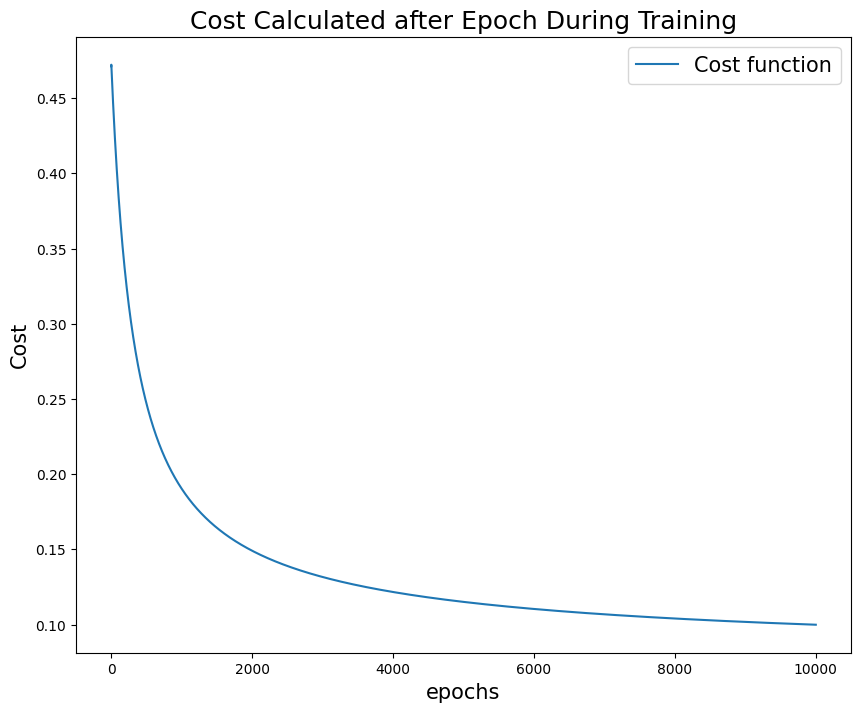

In [132]:
node.plot_cost_function()
plt.show()

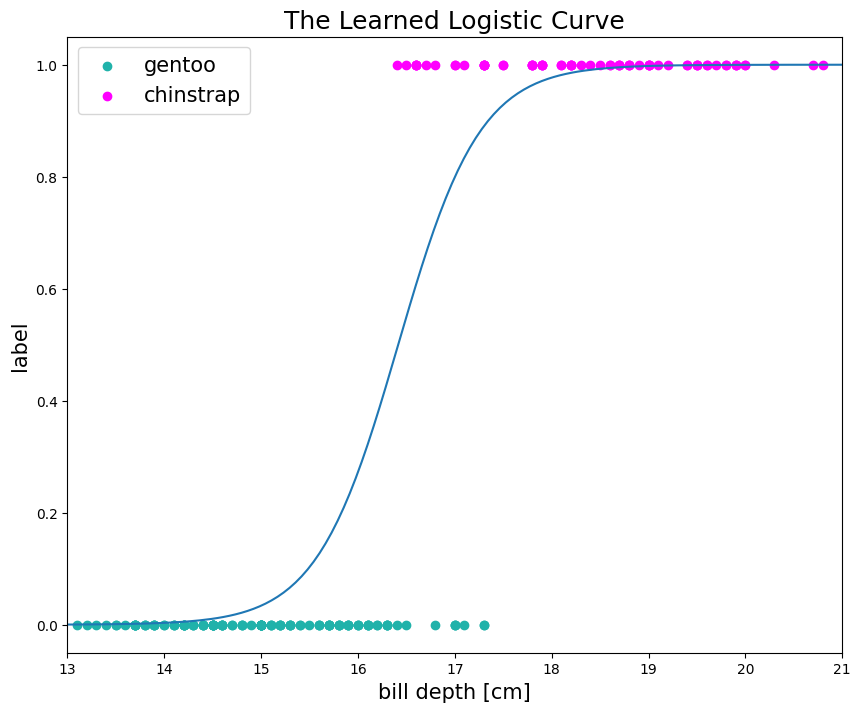

In [133]:
plt.figure(figsize = (10, 8))
plt.xlim((13, 21 ))

plt.scatter(gentoo.bill_depth_mm,
            np.zeros(len(gentoo.bill_depth_mm)),
            color = "lightseagreen",
            label = "gentoo")
plt.scatter(chinstrap.bill_depth_mm,
            np.ones(len(chinstrap.bill_depth_mm)),
            color = "magenta",
            label = "chinstrap")


domain = np.linspace(13, 21, 130)
plt.plot(domain, node.predict(domain.reshape(-1, 1)))
plt.xlabel("bill depth [cm]", fontsize = 15)
plt.ylabel("label", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper left")
plt.title("The Learned Logistic Curve", fontsize = 18)
plt.show()

In [134]:
np.rint(node.predict(X)) != y
classification_error = (np.rint(node.predict(X)) != y).astype(int)
print(f"Classification Error = {sum(classification_error)/ len(y)}")

Classification Error = 0.038461538461538464


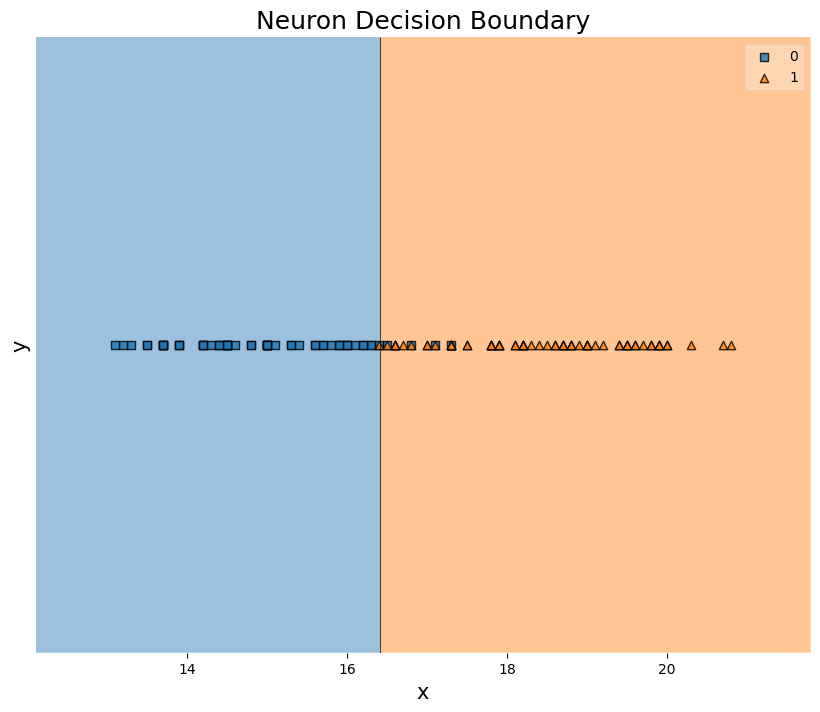

In [138]:
from mlxtend.plotting import plot_decision_regions
node.plot_decision_boundary(X, y)
plt.show()

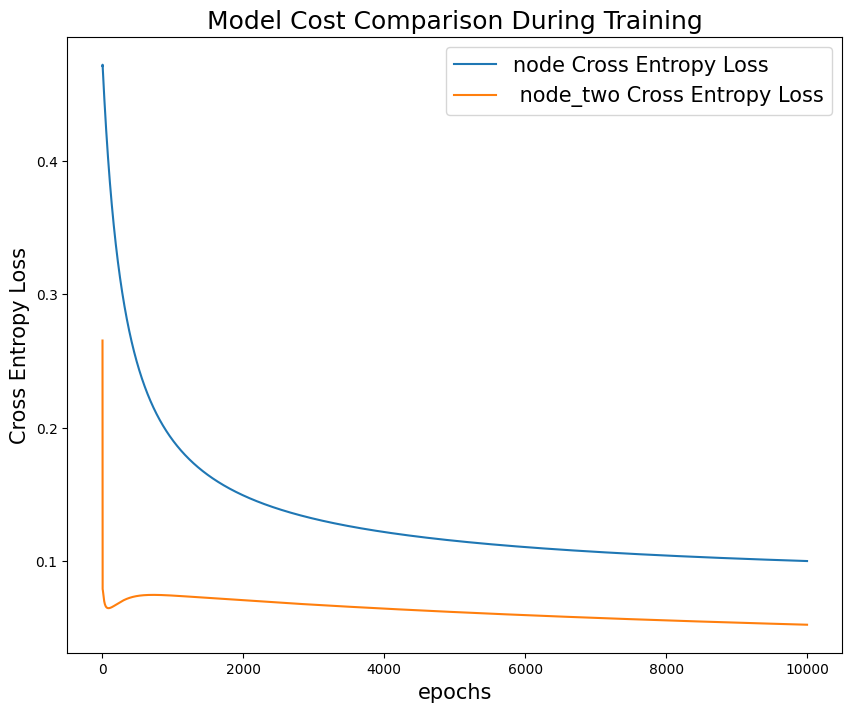

In [180]:
node_two = SingleNeuron(sigmoid, cross_entropy_loss)
gentoo_downsampled = resample(gentoo,
                               replace=False,     # sample without replacement
                               n_samples=62,      # match minority class
                               random_state=42)
balanced_data = pd.concat([gentoo_downsampled, chinstrap])
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)
X_two = balanced_data[["bill_length_mm", "bill_depth_mm"]].values

# Train the new single neuron model on the new feature vectors.
node_two.train(X_two, y, alpha = 0.0018, epochs = 10_000)


plt.figure(figsize = (10, 8))
plt.plot(range(1, len(node.errors_) + 1),
         node.errors_,
         label = "node Cross Entropy Loss")
plt.plot(range(1, len(node_two.errors_) + 1),
         node_two.errors_,
         label = " node_two Cross Entropy Loss")
plt.xlabel("epochs", fontsize = 15)
plt.ylabel("Cross Entropy Loss", fontsize = 15)
plt.legend(fontsize = 15)
plt.title("Model Cost Comparison During Training", fontsize = 18)


plt.show()

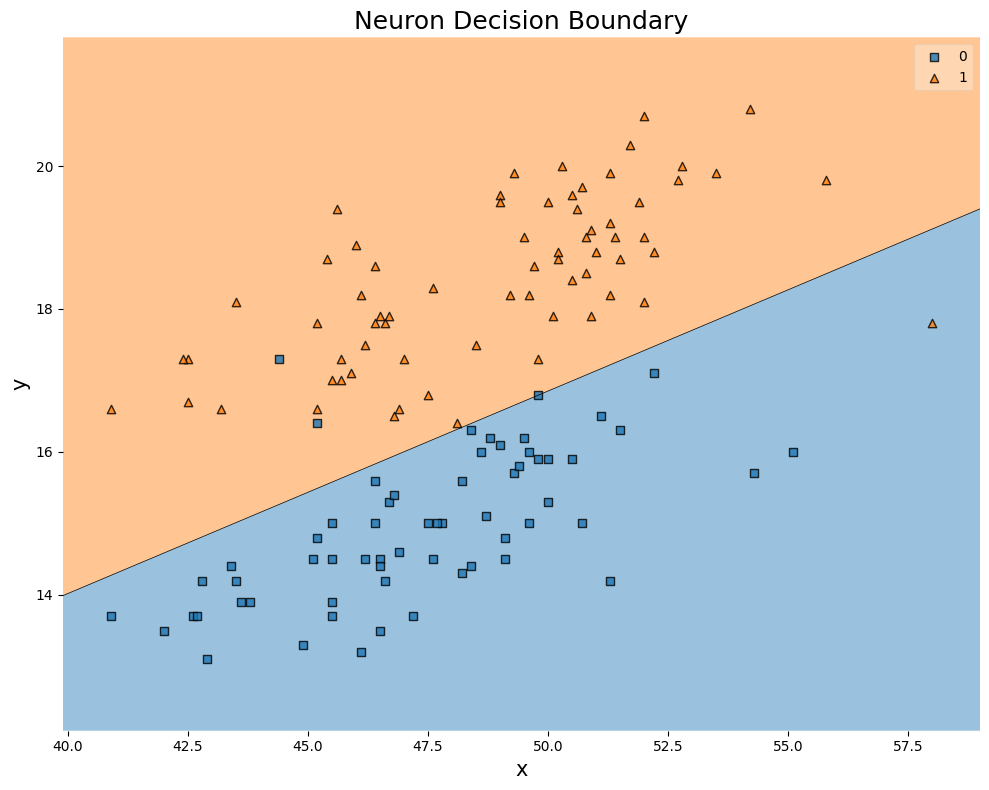

In [181]:

node_two.plot_decision_boundary(X_two, y)

In [182]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

# Set up k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize variables to track performance
accuracy_scores = []

# Loop through each fold
for train_index, test_index in kf.split(X_two):
    # Split the data into training and testing sets
    X_train, X_test = X_two[train_index], X_two[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Initialize a new neuron for each fold
    node_two = SingleNeuron(sigmoid, cross_entropy_loss)

    # Train the neuron
    node_two.train(X_train, y_train, alpha=0.0018, epochs=10_000)

    # Make predictions on the test set
    y_pred = np.where(node_two.predict(X_test) >= 0.5, 1, 0)

    # Calculate the accuracy for this fold
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Calculate the average accuracy across all folds
avg_accuracy = np.mean(accuracy_scores)
print(f"Average Accuracy: {avg_accuracy:.4f}")


<ipython-input-131-691f7ebb5478>:4: RuntimeWarning: divide by zero encountered in log
  return - y*np.log(y_hat) - (1 - y)*np.log(1 - y_hat)
<ipython-input-131-691f7ebb5478>:4: RuntimeWarning: invalid value encountered in scalar multiply
  return - y*np.log(y_hat) - (1 - y)*np.log(1 - y_hat)


Average Accuracy: 0.9538
